In [3]:
import pandas as pd
import geopandas as gpd
import glob
import os

import rasterio
from rasterio.features import shapes
from shapely.geometry import shape



# Get all tif files from data directory, rename to forward slash paths
raster_files =  glob.glob('./data/*.tif')
raster_files_named = []
for raster_file in raster_files:
    raster_files_named.append(raster_file.replace('\\','/'))
print(', '.join(raster_files_named))

# The name for each output shp file corresponding to each processed tif.
output_files = ['100yr Existing Depth Dissolved.shp','100yr Prop1 Depth Dissolved.shp', '10yr Existing Depth Dissolved.shp',
                '10yr Prop1 Depth Dissolved.shp', '2yr Existing Depth Dissolved.shp','2yr Prop1 Depth Dissolved.shp',]

./data/100yrExistDepth (Max).2018_Terrain.2018_1m.tif, ./data/100yrProp1Depth (Max).2018_Terrain.2018_1m.tif, ./data/10yrExistingDepth (Max).2018_Terrain.2018_1m.tif, ./data/10yr_Prop1_Depth (Max).2018_Terrain.2018_1m.tif, ./data/2yrExistingDepth (Max).2018_Terrain.2018_1m.tif, ./data/2yrProp1_Depth (Max).2018_Terrain.2018_1m.tif


In [4]:
# build dataframe of inputs and outputs
df = pd.DataFrame(columns=['raster_file', 'output_file'], data=zip(raster_files_named, output_files))
df

,raster_file,output_file
0,./data/100yrExistDepth (Max).2018_Terrain.2018...,100yr Existing Depth Dissolved.shp
1,./data/100yrProp1Depth (Max).2018_Terrain.2018...,100yr Prop1 Depth Dissolved.shp
2,./data/10yrExistingDepth (Max).2018_Terrain.20...,10yr Existing Depth Dissolved.shp
3,./data/10yr_Prop1_Depth (Max).2018_Terrain.201...,10yr Prop1 Depth Dissolved.shp
4,./data/2yrExistingDepth (Max).2018_Terrain.201...,2yr Existing Depth Dissolved.shp
5,./data/2yrProp1_Depth (Max).2018_Terrain.2018_...,2yr Prop1 Depth Dissolved.shp


In [5]:
# For each row in the dataframe, convert the raster to a shapefile using rasterio, dissolve the shapefile using geopandas, and save the output to the output directory.
for index, row in df.iterrows():
    print(row['raster_file'], row['output_file'])
    with rasterio.open(row['raster_file']) as src:
        data = src.read(1, masked=True)

        # Use a generator instead of a list
        shape_gen = ((shape(s), v) for s, v in shapes(data, transform=src.transform))

        # build a DataFrames from the shape generator
        shape_df = pd.DataFrame(shape_gen, columns=['geometry', 'class'])
        gdf = gpd.GeoDataFrame(shape_df["class"], geometry=shape_df.geometry, crs=src.crs)
    
    # dissolve the shapefile to a single polygon
    dissolved_gdf = gdf.dissolve()
    dissolved_gdf.to_file(f"./output/{row['output_file']}")

./data/100yrExistDepth (Max).2018_Terrain.2018_1m.tif 100yr Existing Depth Dissolved.shp
./data/100yrProp1Depth (Max).2018_Terrain.2018_1m.tif 100yr Prop1 Depth Dissolved.shp
./data/10yrExistingDepth (Max).2018_Terrain.2018_1m.tif 10yr Existing Depth Dissolved.shp
./data/10yr_Prop1_Depth (Max).2018_Terrain.2018_1m.tif 10yr Prop1 Depth Dissolved.shp
./data/2yrExistingDepth (Max).2018_Terrain.2018_1m.tif 2yr Existing Depth Dissolved.shp
./data/2yrProp1_Depth (Max).2018_Terrain.2018_1m.tif 2yr Prop1 Depth Dissolved.shp


<Axes: >

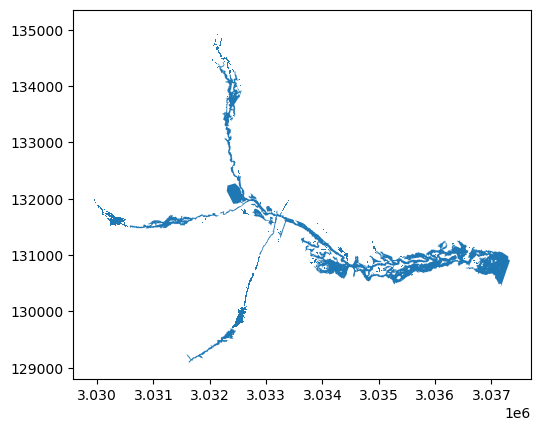

In [6]:
dissolved_gdf.plot()